In [498]:
#Importing all the neccessary libraries for Analysis
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE # used for creating synthetic new datapoints
%matplotlib inline
# sns.set_theme()

In [499]:
# read the dataset
df1 = pd.read_csv('./data/applicant.csv') 
df2 = pd.read_csv('./data/loan.csv')

# Data Preprocessing

In [500]:
#Glimpse of top5 entry
df1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [501]:
"""Only 5 columns have the int dtype else are string"""
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

In [502]:
# telephone column wont contribute in prediction thus we can drop it
df1.drop('Telephone',inplace=True,axis=1)

<AxesSubplot:>

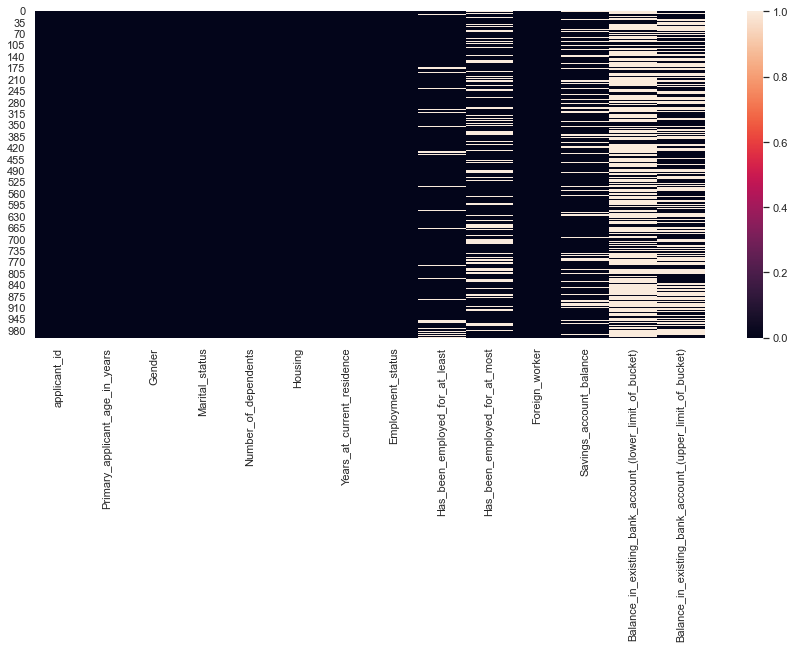

In [503]:
"""CHecking for the missing values"""
plt.figure(figsize=(15,6))
sns.heatmap(df1.isna())

In [504]:
# All the columns having atleast 1 null values
df1[df1.columns[(df1.isna().sum() > 0)]].isna().sum()

Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

### Feature Engineering

In [505]:
"""Changing the string to int and replacing null values with 0"""
df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)'] = \
    np.where(df1['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=='2 lac',2,0)

In [506]:
"""Replacing male with 1 and female with 0"""
df1['Gender'] = np.where(df1['Gender']=='male',1,0)

In [507]:
"""Changing the string(2 lac) to int(2) and replacing null values with 0"""
df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)'] = \
    np.where(df1['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=='2 lac',2,0)    

In [508]:
# Function to extract int from string and leave nan values as it is
def change(par):
    if pd.isna(par):
        return par
    else:
        par = str(par)
        par = par.split()[0]
        return int(par)

In [509]:
"""Changing the string to int"""
df1.Has_been_employed_for_at_least = \
df1.Has_been_employed_for_at_least.apply(change)

df1.Has_been_employed_for_at_most = \
df1.Has_been_employed_for_at_most.apply(change)

In [510]:
"""Replaing the NaN values by mean"""
mean1 = int(np.floor(df1.Has_been_employed_for_at_least.mean()+0.5))
df1.Has_been_employed_for_at_least.fillna(mean1,inplace=True)

mean1 = int(np.floor(df1.Has_been_employed_for_at_most.mean()+0.5))

df1.Has_been_employed_for_at_most.fillna(mean1,inplace=True)

In [511]:
"""Replacing null values with mode , as its the categorical value"""
df1.Savings_account_balance.fillna(df1.Savings_account_balance.mode(),inplace=True)

In [512]:
### Pick random sample from the column("Savings_account_balance"), and fill it in NaN position
df1['Saving_Account_random']=df1['Savings_account_balance']
random_sample= \
    df1['Savings_account_balance'].dropna().sample(df1['Savings_account_balance'].isnull().sum(),random_state=0)
random_sample.index=df1[df1['Savings_account_balance'].isnull()].index
df1.loc[df1['Savings_account_balance'].isnull(),'Saving_Account_random']=random_sample
df1.Savings_account_balance = df1.Saving_Account_random
df1.drop('Saving_Account_random',inplace=True,axis=1)

In [513]:
df1.Savings_account_balance.value_counts()

Low          747
Medium       126
High          72
Very high     55
Name: Savings_account_balance, dtype: int64

<AxesSubplot:>

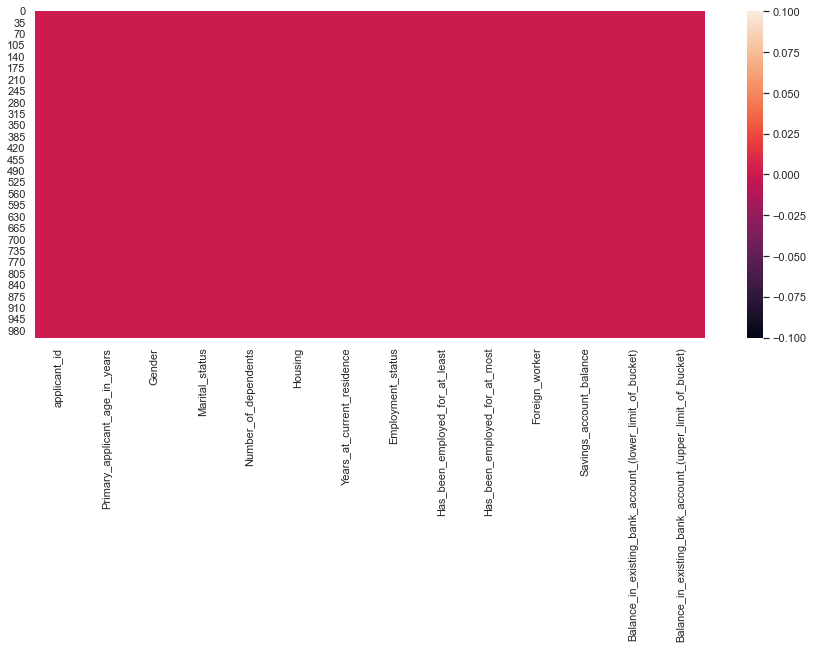

In [514]:
"""No null values left"""
plt.figure(figsize=(15,6))
sns.heatmap(df1.isna())

In [515]:
df2.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


<AxesSubplot:>

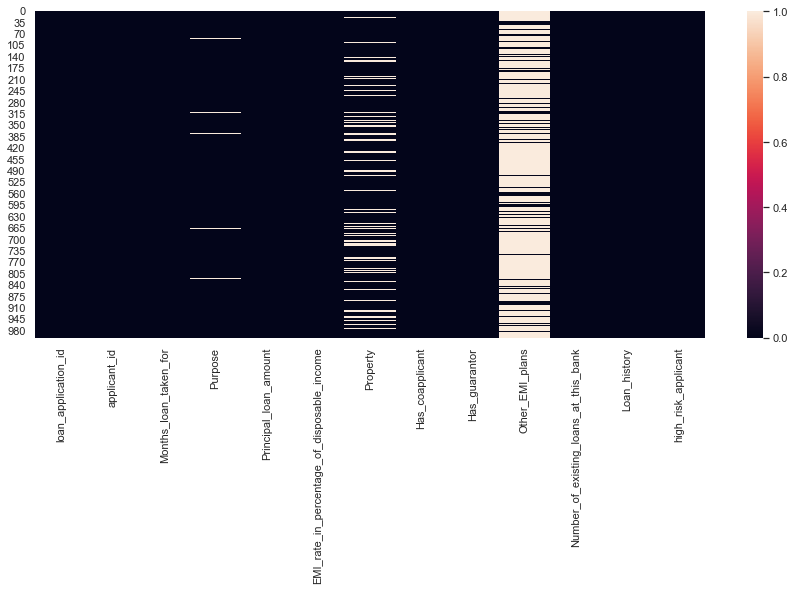

In [516]:
plt.figure(figsize=(15,6))
sns.heatmap(df2.isna())

In [517]:
#Dropping unneccesarily columns 
df2.drop(['loan_application_id','Purpose','Other_EMI_plans'],inplace=True,axis=1)

In [518]:
"""Property columns have nan values , we can apply same technique of random sampling filling Nan values"""
df2.Property.value_counts()

car or other                                         332
real estate                                          282
building society savings agreement/life insurance    232
Name: Property, dtype: int64

In [519]:
df2['Property_random']=df2['Property']
random_sample=df2['Property'].dropna().sample(df2['Property'].isnull().sum(),random_state=0)
random_sample.index=df2[df2['Property'].isnull()].index
df2.loc[df2['Property'].isnull(),'Property_random']=random_sample
df2.Property = df2.Property_random
df2.drop('Property_random',inplace=True,axis=1)

In [520]:
df2.isna().sum()

applicant_id                                   0
Months_loan_taken_for                          0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
dtype: int64

In [521]:
"""Since df1 and df2 are data of applicatant having unique Applicant id. We can merge the both dataset using left join 
method"""
df = df2.merge(df1,on='applicant_id',how='left')

In [522]:
"""Small info of each columns , still some columns have string values"""
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   applicant_id                                              1000 non-null   int64  
 1   Months_loan_taken_for                                     1000 non-null   int64  
 2   Principal_loan_amount                                     1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income               1000 non-null   int64  
 4   Property                                                  1000 non-null   object 
 5   Has_coapplicant                                           1000 non-null   int64  
 6   Has_guarantor                                             1000 non-null   int64  
 7   Number_of_existing_loans_at_this_bank                     1000 non-null   int64  
 8   Loan_history       

### One_Hot_Encoding


In [523]:
col = ['Savings_account_balance','Housing','Property','Loan_history','Employment_status','Marital_status']

In [524]:
df =pd.get_dummies(df,columns=col)

In [525]:
df.columns.shape

(40,)

In [526]:
# Each column is int now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                                                                              Non-Null Count  Dtype  
---  ------                                                                              --------------  -----  
 0   applicant_id                                                                        1000 non-null   int64  
 1   Months_loan_taken_for                                                               1000 non-null   int64  
 2   Principal_loan_amount                                                               1000 non-null   int64  
 3   EMI_rate_in_percentage_of_disposable_income                                         1000 non-null   int64  
 4   Has_coapplicant                                                                     1000 non-null   int64  
 5   Has_guarantor                                                                       1000 non-null 

In [527]:
# Now we dont need applicantid , so we can remove it
df.drop('applicant_id',inplace=True,axis=1)

In [528]:
# diving whole df into X(independent var) and y(dependent variable)
X = df.drop('high_risk_applicant',axis=1)
y = df['high_risk_applicant']

In [529]:
### Importing Neccessary sklearn library 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA,KernelPCA

In [530]:
""" Since each column have its own diff scale, we should bring them on one scale which will cause Gradient Descent to 
converge faster and also increase models accuracy"""
ss = StandardScaler() ## Perform Normal distribution
X = ss.fit_transform(X) ## fit_transform is to apply change and replace original with result of transform

### Dimensionality Reduction / Feature Selection


We have total of 38 features , some of them wont contribute to result, will result in bringing noise which will reduce
the models accuracy. We should keep only those features which are relevant to result and get rid of others

In [531]:
"""PCA looks for the explained variance of each columns"""
pca_39 = PCA(n_components=38,random_state=42)
X_pca38 = pca_39.fit_transform(X)
pca_39.explained_variance_ratio_*100

array([9.17169045e+00, 6.68473580e+00, 5.87499814e+00, 5.51189393e+00,
       5.19416727e+00, 4.71836458e+00, 4.27401504e+00, 3.86542524e+00,
       3.69690961e+00, 3.45291013e+00, 3.43207337e+00, 3.25632148e+00,
       3.06421039e+00, 2.95048544e+00, 2.84647933e+00, 2.79889977e+00,
       2.73042341e+00, 2.62787325e+00, 2.54746232e+00, 2.47353731e+00,
       2.36777260e+00, 2.30175506e+00, 2.15503048e+00, 2.02507902e+00,
       1.99361665e+00, 1.89138480e+00, 1.69969266e+00, 1.45198184e+00,
       1.21490925e+00, 1.07842035e+00, 6.47481015e-01, 1.80879701e-30,
       6.66760999e-31, 5.51507978e-31, 3.58318768e-31, 2.82631182e-31,
       1.75372348e-31, 4.13952034e-32])

As we can see last few columns have worse variance ration, they are not relevant for prediction

Text(0, 0.5, 'Explained Variance')

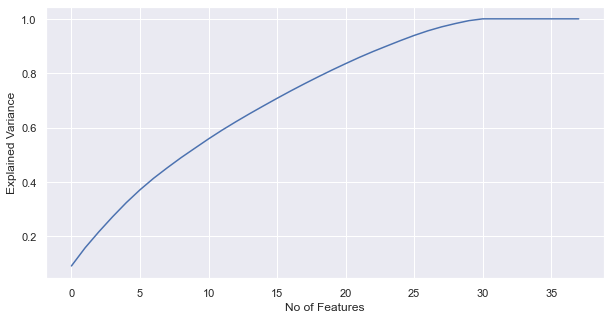

In [532]:
"""Plotting the Explained variance vs no of columns """
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca_39.explained_variance_ratio_))
plt.xlabel('No of Features')
plt.ylabel('Explained Variance')


In [533]:
"""Cumulative sum of explained_variance_ratio"""
cumsum = np.cumsum(pca_39.explained_variance_ratio_)

In [534]:
""" We will take those columns which will contribute upto 95% variance and will drop remaining"""
d = np.argmax(cumsum > .95)+1
pca = PCA(n_components=d,random_state=42)
X_reduced = pca.fit_transform(X)
d # no of columns left , will be used in making prediction

27

In [535]:
y.value_counts()

0    700
1    300
Name: high_risk_applicant, dtype: int64

As we can see , our dataset is highly imbalanced , positive class appears 700 times and 0 class only 300 times . If our model even always say yes, it will be 70% times correct. To ensure that the each class is get predicted with equal probability , we want equal instance of each class .

In [536]:
"""Smote create new synthetic data points , thus upsample lower class"""
oversample = SMOTE()
X,y = oversample.fit_resample(X_reduced,y)

In [537]:
"""Now both class have same amount of instance"""
y.value_counts()

0    700
1    700
Name: high_risk_applicant, dtype: int64

### Model Building

In [538]:

"""Splitting the x,y into training and test set , test set = .25*train set"""
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=.25,random_state=40)

In [539]:
"""Importing neccessary libraries"""
import lightgbm as lgb
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score , accuracy_score , recall_score
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay
import xgboost
from sklearn.model_selection import cross_val_predict

In [540]:
# out of 1400 dataset 1050 will be used for training and 350 for testing
y_test.value_counts()

1    175
0    175
Name: high_risk_applicant, dtype: int64

In [564]:
"""Creating instance of each clf. The Hyperparams used are found using GridSearchCV"""
lgbm_clf = LGBMClassifier()
xg_clf = xgboost.XGBClassifier()
ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),n_estimators=200,learning_rate=0.5,
                            algorithm='SAMME.R')
gnb_clf = GaussianNB()
svc_clf = SVC(C = 0.7,gamma=0.07,probability=True) 
rfc_clf = RandomForestClassifier(n_estimators=200,max_depth=4)
lr_clf = LogisticRegression()

Our problem statement wants that if model says loan has less risk , its prediction accuracy for yes should be high,ie 
we want a high precision 

In [565]:
"""We can get the decision function for each clf , and set the threshold in such a way that we can get the desired 
precision we want , but there exist Precision/Recall tradeoff ie increasing precision will decrease recall 
and vice versa . we will set our threshold in such a way that we have good precion with significant recall in hand"""
y_scores = cross_val_predict(svc_clf,X_train,y_train,cv=3,method='decision_function')

In [566]:
from sklearn.metrics import precision_recall_curve
precisions , recalls , threshold = precision_recall_curve(y_train,y_scores)

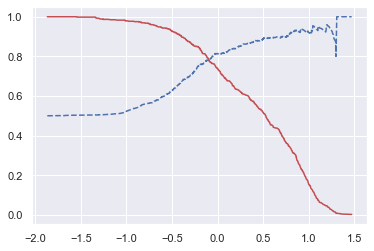

In [567]:
"""Plotting the change in precision& recall with threshold"""
plt.plot(threshold,precisions[:-1],"b--",label="Precision")
plt.plot(threshold,recalls[:-1],"r-",label="Precision")
plt.show()

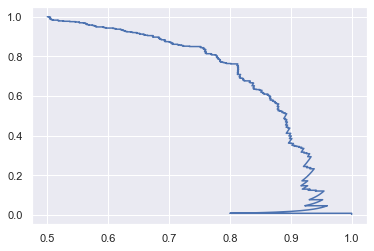

In [568]:
plt.plot(precisions[:-1],recalls[:-1])

In [569]:
"""Getting the threshold value where precision == recall"""
threshold_precision = threshold[np.argmax(precisions == recalls)]

In [570]:
"""Say we want 80% precision"""
threshold80 = threshold[np.argmax(precisions > 0.8)]
threshold80

-0.058765558860586375

In [571]:
y_train_90 = (y_scores > threshold90)

In [572]:
y_train_90

array([False, False, False, ..., False, False, False])

In [573]:
accuracy_score(y_train,y_train_90)

0.7723809523809524

In [574]:
precision_score(y_train,y_train_90)

0.8163716814159292

In [575]:
recall_score(y_train,y_train_90)

0.7028571428571428

We will use ensemble method of varioud different classifier and will perform voting among their result to get the final prediction

In [576]:
def CreateModel(name,model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    pred = model.predict(X_test)
    print(f"{name} Classifier")
    print(classification_report(y_test,pred,zero_division=0))
    cm = confusion_matrix(y_test,pred)
    sns.heatmap(cm,annot=True,fmt='g',cmap='Blues')
    plt.show()

    print("/*****************************************************************/")
    

In [577]:
Models = {
    "LightGBM":lgbm_clf,
    "Gaussian Naive Bayes":gnb_clf,
    "RBF Kernel SVC":svc_clf,
    "Random Forest Classifier":rfc_clf,
    "XGBoost":xg_clf,
    "AdaBoost":ada_clf,
    "Logistic Regression":lr_clf
}

LightGBM Classifier
              precision    recall  f1-score   support

           0       0.82      0.74      0.77       175
           1       0.76      0.83      0.80       175

    accuracy                           0.79       350
   macro avg       0.79      0.79      0.79       350
weighted avg       0.79      0.79      0.79       350



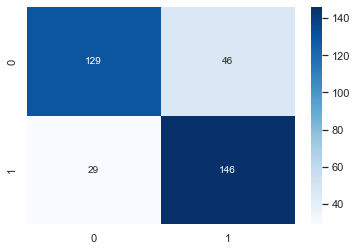

/*****************************************************************/
Gaussian Naive Bayes Classifier
              precision    recall  f1-score   support

           0       0.65      0.57      0.60       175
           1       0.61      0.69      0.65       175

    accuracy                           0.63       350
   macro avg       0.63      0.63      0.63       350
weighted avg       0.63      0.63      0.63       350



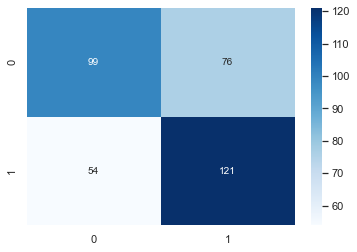

/*****************************************************************/
RBF Kernel SVC Classifier
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       175
           1       0.80      0.78      0.79       175

    accuracy                           0.79       350
   macro avg       0.79      0.79      0.79       350
weighted avg       0.79      0.79      0.79       350



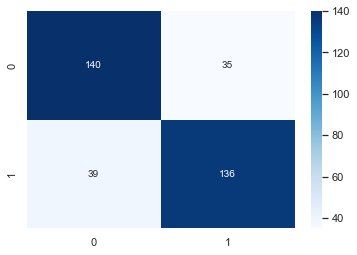

/*****************************************************************/
Random Forest Classifier Classifier
              precision    recall  f1-score   support

           0       0.69      0.58      0.63       175
           1       0.64      0.74      0.69       175

    accuracy                           0.66       350
   macro avg       0.67      0.66      0.66       350
weighted avg       0.67      0.66      0.66       350



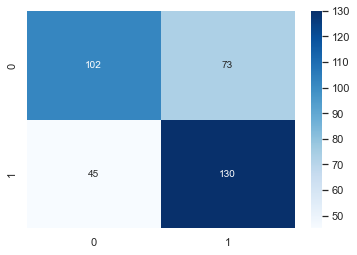

/*****************************************************************/
XGBoost Classifier
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       175
           1       0.73      0.81      0.77       175

    accuracy                           0.76       350
   macro avg       0.76      0.76      0.76       350
weighted avg       0.76      0.76      0.76       350



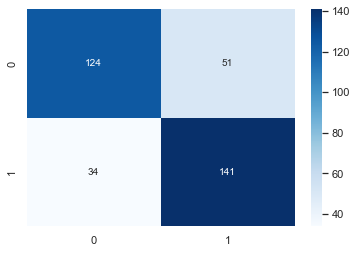

/*****************************************************************/
AdaBoost Classifier
              precision    recall  f1-score   support

           0       0.79      0.71      0.75       175
           1       0.74      0.81      0.77       175

    accuracy                           0.76       350
   macro avg       0.76      0.76      0.76       350
weighted avg       0.76      0.76      0.76       350



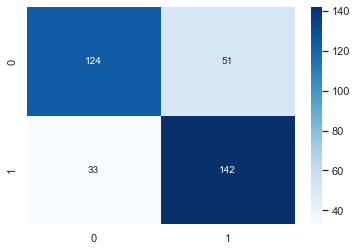

/*****************************************************************/
Logistic Regression Classifier
              precision    recall  f1-score   support

           0       0.70      0.57      0.63       175
           1       0.64      0.75      0.69       175

    accuracy                           0.66       350
   macro avg       0.67      0.66      0.66       350
weighted avg       0.67      0.66      0.66       350



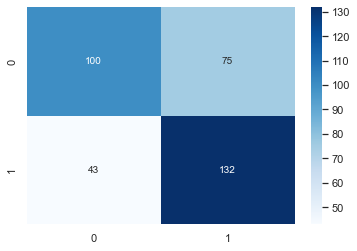

/*****************************************************************/


In [578]:
for model in Models:
    CreateModel(model,Models[model],X_train,y_train,X_test,y_test)

Voting Classifier Classifier
              precision    recall  f1-score   support

           0       0.81      0.69      0.74       175
           1       0.73      0.84      0.78       175

    accuracy                           0.76       350
   macro avg       0.77      0.76      0.76       350
weighted avg       0.77      0.76      0.76       350



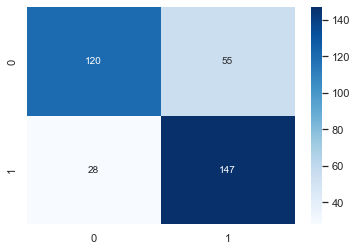

/*****************************************************************/


In [556]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[('nb',gnb_clf),('svc',svc_clf),('xgboost',xg_clf),
                    ("rfc",rfc_clf),("adaboost",ada_clf),("lgbm",lgbm_clf),("lr",lr_clf)],
                             voting="soft")
CreateModel("Voting Classifier",voting_clf,X_train,y_train,X_test,y_test)

In [557]:
precision_score(voting_clf.predict(X_test),y_test)

0.84

In [558]:
prob = voting_clf.predict_proba(X_test)

In [559]:
prob.shape

(350, 2)

In [560]:
from sklearn.metrics import roc_auc_score , roc_curve

In [561]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

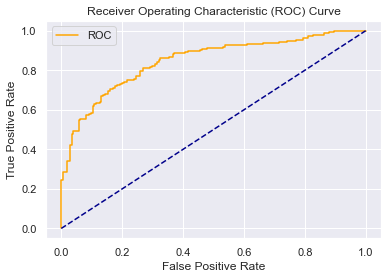

AUC-ROC : 0.8464979591836735


In [562]:
probs = voting_clf.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
fpr, tpr, thresholds = roc_curve(y_test, probs)
plot_roc_curve(fpr, tpr)
print("AUC-ROC :",auc)